In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import main
from patsy import dmatrices
import statsmodels.api as sm
from pandas.plotting import lag_plot

In [65]:
data = main.getdata('data/timeseries9May.csv')

In [66]:
data = data.loc[data['country'].isin(['Netherlands', 'Belgium', 'Italy', 'Sweden', 'Denmark', 'Norway', 'Spain', 'United_Kingdom', 'Germany', 'Romania'])]

In [67]:
len(data['country'].unique())

10

In [68]:
data.head()

,date,day,month,year,cases,deaths,country,geoId,countryCode,pop,continentExp
11142,2019-12-31,31,12,2019,0,0,Norway,NO,NOR,5314336.0,Europe
5790,2019-12-31,31,12,2019,0,0,Germany,DE,DEU,82927922.0,Europe
1675,2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,11422068.0,Europe
12247,2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19473936.0,Europe
15234,2019-12-31,31,12,2019,0,0,United_Kingdom,UK,GBR,66488991.0,Europe


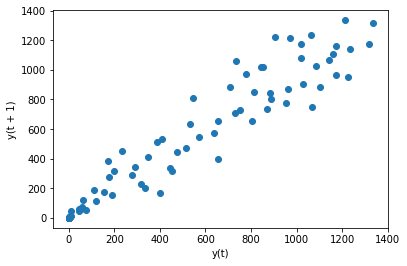

In [69]:
lag_plot(data.loc[data['country']=='Netherlands', 'cases'])
plt.show()

Add columns for cases of yesterday and predictions of yesterday. 

In [70]:
data = data.assign(expcasesyest=np.nan, casesyest=np.nan)

In [71]:
for country in data['country'].unique(): 
    data.loc[data['country']==country, 'casesyest'] = data.loc[data['country']==country].cases.shift(1)

In [72]:
data.loc[data['casesyest'].isnull(), ['casesyest', 'expcasesyest']] = 0

In [74]:
data.head()

,date,day,month,year,cases,deaths,country,geoId,countryCode,pop,continentExp,expcasesyest,casesyest
11142,2019-12-31,31,12,2019,0,0,Norway,NO,NOR,5314336.0,Europe,0.0,0.0
5790,2019-12-31,31,12,2019,0,0,Germany,DE,DEU,82927922.0,Europe,0.0,0.0
1675,2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,11422068.0,Europe,0.0,0.0
12247,2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19473936.0,Europe,0.0,0.0
15234,2019-12-31,31,12,2019,0,0,United_Kingdom,UK,GBR,66488991.0,Europe,0.0,0.0


Regression model based on https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958.

In [97]:
expr = """cases ~  (1+casesyest) + (1+expcasesyest)"""

In [102]:
df_train = data.loc[data['country'].isin(['Netherlands', 'Belgium', 'Italy', 'Sweden', 'Denmark'])]
y_train, X_train = dmatrices(expr, df_train.loc[df_train['date']=='2020-01-20'], return_type='dataframe')

In [103]:
df_test = data.loc[data['country'].isin(['United_Kingdom', 'Romania', 'Germany', 'Spain', 'Norway'])]
y_test, X_test = dmatrices(expr, df_test.loc[df_test['date']=='2020-01-20'], return_type='dataframe')

In [100]:
df_train.loc[(df_train['date'] >= '2019-12-31') & (df_train['date']<= '2020-03-01')]

,date,day,month,year,cases,deaths,country,geoId,countryCode,pop,continentExp,expcasesyest,casesyest
1675,2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,11422068.0,Europe,0.0,0.0
10455,2019-12-31,31,12,2019,0,0,Netherlands,NL,NLD,17231017.0,Europe,0.0,0.0
4102,2019-12-31,31,12,2019,0,0,Denmark,DK,DNK,5797446.0,Europe,0.0,0.0
14102,2019-12-31,31,12,2019,0,0,Sweden,SE,SWE,10183175.0,Europe,0.0,0.0
7753,2019-12-31,31,12,2019,0,0,Italy,IT,ITA,60431283.0,Europe,0.0,0.0
14101,2020-01-01,1,1,2020,0,0,Sweden,SE,SWE,10183175.0,Europe,NaN,0.0
10454,2020-01-01,1,1,2020,0,0,Netherlands,NL,NLD,17231017.0,Europe,NaN,0.0
4101,2020-01-01,1,1,2020,0,0,Denmark,DK,DNK,5797446.0,Europe,NaN,0.0
1674,2020-01-01,1,1,2020,0,0,Belgium,BE,BEL,11422068.0,Europe,NaN,0.0
7752,2020-01-01,1,1,2020,0,0,Italy,IT,ITA,60431283.0,Europe,NaN,0.0


In [89]:
df_train.loc[df_train['date'].between('2019-12-31','2020-03-01')]

,date,day,month,year,cases,deaths,country,geoId,countryCode,pop,continentExp,expcasesyest,casesyest
1675,2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,11422068.0,Europe,0.0,0.0
10455,2019-12-31,31,12,2019,0,0,Netherlands,NL,NLD,17231017.0,Europe,0.0,0.0
4102,2019-12-31,31,12,2019,0,0,Denmark,DK,DNK,5797446.0,Europe,0.0,0.0
14102,2019-12-31,31,12,2019,0,0,Sweden,SE,SWE,10183175.0,Europe,0.0,0.0
7753,2019-12-31,31,12,2019,0,0,Italy,IT,ITA,60431283.0,Europe,0.0,0.0
14101,2020-01-01,1,1,2020,0,0,Sweden,SE,SWE,10183175.0,Europe,NaN,0.0
10454,2020-01-01,1,1,2020,0,0,Netherlands,NL,NLD,17231017.0,Europe,NaN,0.0
4101,2020-01-01,1,1,2020,0,0,Denmark,DK,DNK,5797446.0,Europe,NaN,0.0
1674,2020-01-01,1,1,2020,0,0,Belgium,BE,BEL,11422068.0,Europe,NaN,0.0
7752,2020-01-01,1,1,2020,0,0,Italy,IT,ITA,60431283.0,Europe,NaN,0.0


In [112]:
poisson_training_results = sm.miscmodels.count.PoissonZiGMLE(y_train, X_train, family=sm.families.Poisson()).fit()

AttributeError: module 'statsmodels.api' has no attribute 'miscmodels'

In [106]:
df_train.loc[df_train['date']=='2020-01-20']

,date,day,month,year,cases,deaths,country,geoId,countryCode,pop,continentExp,expcasesyest,casesyest
1655,2020-01-20,20,1,2020,0,0,Belgium,BE,BEL,11422068.0,Europe,NaN,0.0
14082,2020-01-20,20,1,2020,0,0,Sweden,SE,SWE,10183175.0,Europe,NaN,0.0
10435,2020-01-20,20,1,2020,0,0,Netherlands,NL,NLD,17231017.0,Europe,NaN,0.0
7733,2020-01-20,20,1,2020,0,0,Italy,IT,ITA,60431283.0,Europe,NaN,0.0
4082,2020-01-20,20,1,2020,0,0,Denmark,DK,DNK,5797446.0,Europe,NaN,0.0
